# Overview of Stationarity
In this notebook we look at some visual methods for observing stationarity or lack there of.

## Load data from a csv

In [1]:
# Import libraries to manipulate data
import pandas
import numpy 

# Import the libraries to graph data
import matplotlib.pyplot as pyplot

In [2]:
# Write a conversion function to handle our data format
def convert_date_string_to_date(input_string):
    
    # The input variable will be a byte array
    # We will convert this to a string
    #input_string = raw_bytes.decode("utf-8")

    # We then do our manipulation
    input_string = input_string.strip()

    # Make it a date
    result = numpy.datetime64(input_string, 'D')

    return result

test_string = "2019-07-01"
#string_bytes = str.encode(test_string)
convert_date_string_to_date(test_string)

numpy.datetime64('2019-07-01')

In [3]:
# Read the file into a dataframe
file_path = "../../nasdaq_2019.csv"
converter_mapping = {
    "date": convert_date_string_to_date
}
pandas_dataframe = pandas.read_csv(file_path, converters=converter_mapping)

# Sort based on the date column
pandas_dataframe = pandas_dataframe.sort_values("date")

In [4]:
pandas_dataframe.head()

,ticker,interval,date,open,high,low,close,volume
96004,RAND,D,2019-01-01,2.50,2.50,2.50,2.50,0
95734,OPTT,D,2019-01-01,0.34,0.34,0.34,0.34,0
95735,ORBC,D,2019-01-01,8.26,8.26,8.26,8.26,0
95736,ORG,D,2019-01-01,24.49,24.49,24.49,24.49,0
95737,ORGS,D,2019-01-01,4.68,4.68,4.68,4.68,0


In [5]:
# Inspect the column types
pandas_dataframe.dtypes

ticker              object
interval            object
date        datetime64[ns]
open               float64
high               float64
low                float64
close              float64
volume               int64
dtype: object

In [6]:
# Filter out data for a specific ticker
aaba_dataframe = pandas_dataframe.loc[pandas_dataframe.ticker == "AABA"]
# Remove unwanted columns
aaba_dataframe = aaba_dataframe[["date","open"]]
# Show the first few rows
aaba_dataframe.head()

,date,open
93620,2019-01-01,57.94
96799,2019-01-02,56.78
99984,2019-01-03,56.48
103170,2019-01-04,56.50
106357,2019-01-07,58.90


## Generate Random Data

In [7]:
# Generate a data frame with random data
numpy.random.seed([3,1415])
random_ndarray = numpy.random.randn(aaba_dataframe["open"].count())
data = {
    "date": aaba_dataframe["date"],
    "open": random_ndarray
}
random_dataframe = pandas.DataFrame(data=data)

## Compare data with noise

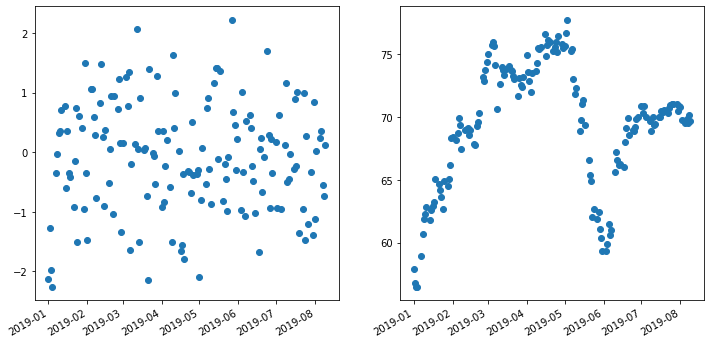

In [8]:
def plot_two_dataframes(dataframe1, dataframe2, x_axis_name, y_axis_name):
    
    # Create a new graph object
    figure, axis = pyplot.subplots(nrows=1,ncols=2,figsize=(12,6))

    # Set the dimensions of the graph area
    xmin = dataframe1[x_axis_name].min()
    xmax = dataframe1[x_axis_name].max()

    # Graph a scatter plot on the graph we created
    axis[0].scatter(dataframe1[x_axis_name], dataframe1[y_axis_name])
    axis[1].scatter(dataframe2[x_axis_name], dataframe2[y_axis_name])
    
    # Beautify the x-labels
    pyplot.gcf().autofmt_xdate()


plot_two_dataframes(random_dataframe, aaba_dataframe, "date", "open")

# Visual Methods for Observing Stationarity

## Look at the Mean and the Variance

In [9]:
def plot_mean_and_variance_for_two_dataframes(dataframe1, dataframe2, x_axis_name, y_axis_name):
    
    # Create a new graph object
    figure, axis = pyplot.subplots(nrows=1,ncols=2,figsize=(12,6))

    # Set the dimensions of the graph area
    xmin = dataframe1[x_axis_name].min()
    xmax = dataframe1[x_axis_name].max()

    # Graph a scatter plot on the graph we created
    axis[0].scatter(dataframe1[x_axis_name], dataframe1[y_axis_name])
    axis[1].scatter(dataframe2[x_axis_name], dataframe2[y_axis_name])
    
    #=======================================================
    # Graph the mean for the first axis
    mean = dataframe1[y_axis_name].mean()
    y1 = mean
    y2 = mean
    x1 = xmin
    x2 = xmax
    axis[0].plot([x1,x2], [y1, y2], color = "red")       
    # Graph the standard deviations above and below the mean
    standard_deviation = dataframe1[y_axis_name].std()
    y1 = mean + standard_deviation
    y2 = mean + standard_deviation
    x1 = xmin
    x2 = xmax
    axis[0].plot([x1,x2], [y1, y2], color = "black")
    standard_deviation = dataframe1[y_axis_name].std()
    y1 = mean - standard_deviation
    y2 = mean - standard_deviation
    x1 = xmin
    x2 = xmax
    axis[0].plot([x1,x2], [y1, y2], color = "black")
    #=======================================================
    # Graph the mean for the first axis
    mean = dataframe2[y_axis_name].mean()
    y1 = mean
    y2 = mean
    x1 = xmin
    x2 = xmax
    axis[1].plot([x1,x2], [y1, y2], color = "red")       
    # Graph the standard deviations above and below the mean
    standard_deviation = dataframe2[y_axis_name].std()
    y1 = mean + standard_deviation
    y2 = mean + standard_deviation
    x1 = xmin
    x2 = xmax
    axis[1].plot([x1,x2], [y1, y2], color = "black")
    standard_deviation = dataframe2[y_axis_name].std()
    y1 = mean - standard_deviation
    y2 = mean - standard_deviation
    x1 = xmin
    x2 = xmax
    axis[1].plot([x1,x2], [y1, y2], color = "black")
    
    
    # Beautify the x-labels
    pyplot.gcf().autofmt_xdate()
    



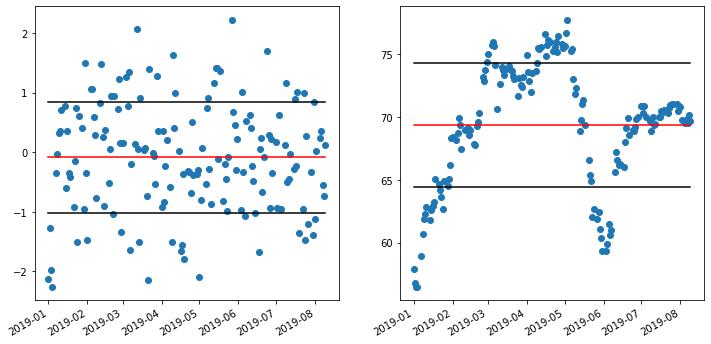

In [10]:
plot_mean_and_variance_for_two_dataframes(random_dataframe, aaba_dataframe, "date", "open")

## Look at the Mean and the Variance over Time
We will create a new dataframe to hold our data for stationarity analysis

In [11]:
def calculate_moving_mean_and_variance(dataframe, column):
    
    # Add a mean and variance column to the dataframe
    aaba_dataframe["mean"] = float(0)
    aaba_dataframe["variance"] = float(0)

    # Loop through the rows oand calculate the moving mean and variance
    x = 0
    for idx, row in dataframe.iterrows():
        dataframe.at[idx, "mean"] = dataframe[column][0:x].mean()
        dataframe.at[idx, "variance"] = dataframe[column][0:x].var()
        x += 1
    return dataframe

In [12]:
random_dataframe = calculate_moving_mean_and_variance(random_dataframe, "open")
aaba_dataframe = calculate_moving_mean_and_variance(aaba_dataframe, "open")

In [13]:
def plot_moving_mean_and_variance_for_two_dataframes(dataframe1, dataframe2, x_axis_name, y_axis_name):
    
    # Create a new graph object
    figure, axis = pyplot.subplots(nrows=1,ncols=2,figsize=(12,6))

    # Set the dimensions of the graph area
    xmin = dataframe1[x_axis_name].min()
    xmax = dataframe1[x_axis_name].max()

    # Graph a scatter plot on the graph we created
    axis[0].scatter(dataframe1[x_axis_name], dataframe1[y_axis_name])
    axis[1].scatter(dataframe2[x_axis_name], dataframe2[y_axis_name])
    
    # Graph the mean and variance
    axis[0].plot(dataframe1[x_axis_name], dataframe1["mean"], color = "red")
    axis[0].plot(dataframe1[x_axis_name], dataframe1["mean"] + dataframe1["variance"], color = "black")
    axis[0].plot(dataframe1[x_axis_name], dataframe1["mean"] - dataframe1["variance"], color = "black")

    axis[1].plot(dataframe1[x_axis_name], dataframe2["mean"], color = "red")
    axis[1].plot(dataframe1[x_axis_name], dataframe2["mean"] + dataframe1["variance"], color = "black")
    axis[1].plot(dataframe1[x_axis_name], dataframe2["mean"] - dataframe1["variance"], color = "black")    
    
    # Beautify the x-labels
    pyplot.gcf().autofmt_xdate()
    

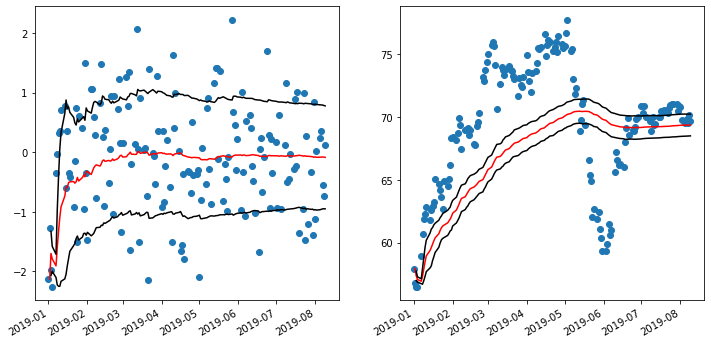

In [14]:
plot_moving_mean_and_variance_for_two_dataframes(random_dataframe, aaba_dataframe, "date", "open")

# Methods for making data stationary

## Calculate differences

In [15]:
random_dataframe["diff"] = random_dataframe.diff()["open"]
aaba_dataframe["diff"] = aaba_dataframe.diff()["open"]
aaba_dataframe.head()

,date,open,mean,variance,diff
93620,2019-01-01,57.94,NaN,NaN,NaN
96799,2019-01-02,56.78,57.940000,NaN,-1.16
99984,2019-01-03,56.48,57.360000,0.672800,-0.30
103170,2019-01-04,56.50,57.066667,0.594533,0.02
106357,2019-01-07,58.90,56.925000,0.476633,2.40


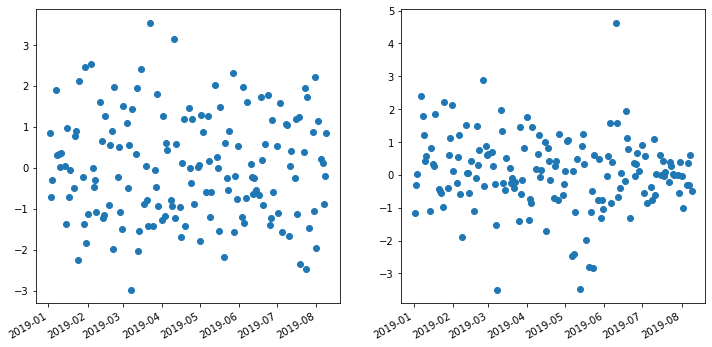

In [16]:
plot_two_dataframes(random_dataframe, aaba_dataframe, "date", "diff")

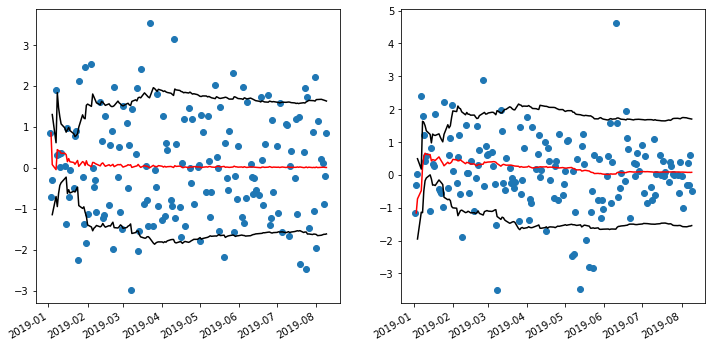

In [17]:
random_dataframe = calculate_moving_mean_and_variance(random_dataframe, "diff")
aaba_dataframe = calculate_moving_mean_and_variance(aaba_dataframe, "diff")
plot_moving_mean_and_variance_for_two_dataframes(random_dataframe, aaba_dataframe, "date", "diff")